<a href="https://colab.research.google.com/github/Colombiant/Analisis-de-datos/blob/main/challenge_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge alura

Durante este desafío, ayudarás al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, analizarás datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

importación de la base de datos

In [2]:
# @title
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Nota:
Tener en cuenta la siguiente aspectos del analisis a considerar.

* Facturación total de cada de cada tienda
* categoria mas populares
* Promedio de calificacion de los clientes
* Productos más y menos vendidos
* costos promedio del envio


In [17]:

ventas_por_categoria = tienda1.groupby("Categoría del Producto")["Precio"].sum()
print(ventas_por_categoria)
print()

promedio = round(tienda1["Calificación"].mean(), 2)
print("promedio:", promedio)
print()

conteo_productos = tienda1["Producto"].value_counts().head(5)
print(conteo_productos)
print()

conteo_tipo_productos = tienda1["Categoría del Producto"].value_counts()
print(conteo_tipo_productos)
print()

costo_promedio = round(tienda1["Costo de envío"].mean(), 2)
print("costo promedio:", costo_promedio)

Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

promedio: 3.98

Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

costo promedio: 26018.61


## Refactorización del proceso

se prensenta el proceso anterior como una funcion que recive parametros del tipo **DataFrame** para evitar la redundancia de codigo.

In [4]:
def resumen_tienda(df, nombre="Tienda"):
    conteo_productos = df["Producto"].value_counts()

    resumen = {
        "Nombre": nombre,
        "Total ventas": round(df["Precio"].sum(), 0),
        "Ventas promedio": round(df["Precio"].mean(), 2),
        "Desviación ventas": round(df["Precio"].std(), 2),
        "Promedio calificación": round(df["Calificación"].mean(), 2),
        "Costo envío promedio": round(df["Costo de envío"].mean(), 2),
        "Desviación envío": round(df["Costo de envío"].std(), 2),
        "Producto más vendido": ", ".join(
            conteo_productos[conteo_productos == conteo_productos.max()].index
        ),
        "Producto menos vendido": ", ".join(
            conteo_productos[conteo_productos == conteo_productos.min()].index
        )
    }
    return resumen

resumenes = [
    resumen_tienda(tienda1, "Tienda 1"),
    resumen_tienda(tienda2, "Tienda 2"),
    resumen_tienda(tienda3, "Tienda 3"),
    resumen_tienda(tienda4, "Tienda 4"),
]

df_resumen = pd.DataFrame(resumenes)
print(df_resumen)

# Ahora creamos la matriz de coeficientes de variación
cv_ventas = df_resumen["Desviación ventas"] / df_resumen["Ventas promedio"]
cv_envio = df_resumen["Desviación envío"] / df_resumen["Costo envío promedio"]

matriz_cv = pd.DataFrame({
    "Nombre": df_resumen["Nombre"],
    "CV Ventas": round(cv_ventas, 4),
    "CV Envío": round(cv_envio, 4)
})

print("\n", matriz_cv)




     Nombre  Total ventas  Ventas promedio  Desviación ventas  \
0  Tienda 1  1.150880e+09        487867.91          614686.77   
1  Tienda 2  1.116344e+09        473227.43          595559.55   
2  Tienda 3  1.098020e+09        465459.77          580643.39   
3  Tienda 4  1.038376e+09        440362.89          568755.60   

   Promedio calificación  Costo envío promedio  Desviación envío  \
0                   3.98              26018.61          32860.00   
1                   4.04              25216.24          31741.38   
2                   4.05              24805.68          30945.89   
3                   4.00              23459.46          30279.10   

                 Producto más vendido                   Producto menos vendido  
0  Microondas, TV LED UHD 4K, Armario  Auriculares con micrófono, Celular ABXY  
1           Iniciando en programación                            Juego de mesa  
2                       Kit de bancas                  Bloques de construcción  
3        

# Graficos

Empezamos mostrando el promedio de ventas por tienda.

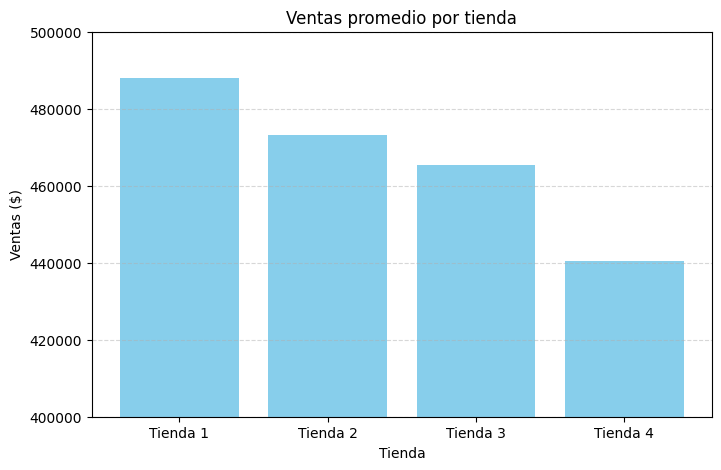

In [7]:
import matplotlib.pyplot as plt

# Comparación de ventas promedio
plt.figure(figsize=(8, 5))
plt.bar(df_resumen["Nombre"], df_resumen["Ventas promedio"], color="skyblue")
plt.title("Ventas promedio por tienda")
plt.ylabel("Ventas ($)")
plt.xlabel("Tienda")
plt.ylim(400000, 500000)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


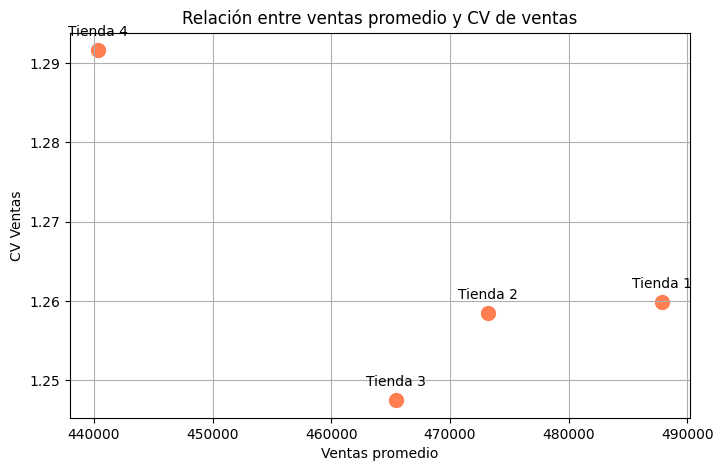

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df_resumen["Ventas promedio"], matriz_cv["CV Ventas"], color="coral", s=100)

for i, row in df_resumen.iterrows():
    plt.annotate(row["Nombre"],
                 (df_resumen["Ventas promedio"][i], matriz_cv["CV Ventas"][i]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.title("Relación entre ventas promedio y CV de ventas")
plt.xlabel("Ventas promedio")
plt.ylabel("CV Ventas")
plt.grid(True)
plt.show()


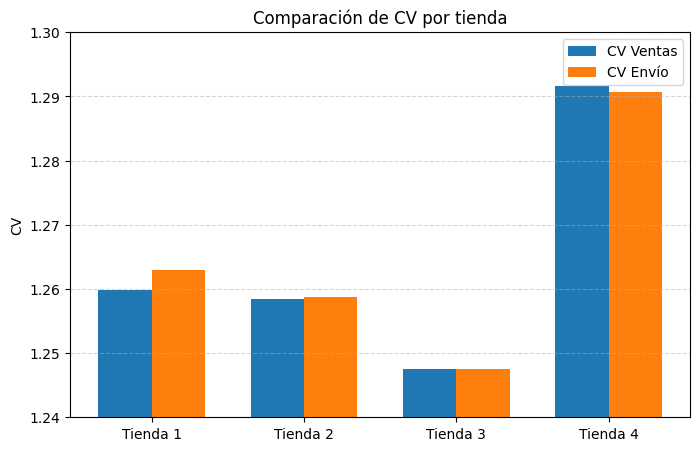

In [10]:
import numpy as np

labels = matriz_cv["Nombre"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, matriz_cv["CV Ventas"], width, label='CV Ventas')
rects2 = ax.bar(x + width/2, matriz_cv["CV Envío"], width, label='CV Envío')

ax.set_ylabel('CV')
ax.set_title('Comparación de CV por tienda')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(1.24, 1.3)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# Informe

El presente informe tiene como objetivo analizar el rendimiento de las cuatro tiendas que conforman la cadena Alura Store, con el fin de identificar cuál de ellas representa la mejor opción para ser vendida. A través del análisis de métricas clave como las ventas promedio, la calificación de los productos, el costo de envío y la estabilidad operativa —medida mediante la desviación estándar y el coeficiente de variación—, se comparan de forma objetiva los resultados de cada tienda. Este enfoque permite evaluar tanto la rentabilidad como la eficiencia relativa de cada punto de venta, proporcionando una base sólida para respaldar una decisión estratégica de desinversión.

El análisis comparativo entre las cuatro sucursales de Alura Store revela diferencias significativas en cuanto a eficiencia operativa, rentabilidad y percepción del cliente.

Tienda 1, aunque lidera en ventas promedio, presenta la mayor desviación tanto en ingresos como en costos logísticos, además de contar con la calificación más baja. Esto sugiere una operación volátil y menos satisfactoria para el cliente. En contraste, Tienda 2 y Tienda 3 muestran un desempeño más equilibrado, destacándose esta última por obtener la mejor calificación de los clientes y mantener costos logísticos relativamente bajos, lo que refleja eficiencia operativa y buena percepción del público.

Tienda 4, si bien presenta el menor costo de envío y una aparente estabilidad en términos absolutos, registra las ventas promedio más bajas y no sobresale en ninguna otra métrica relevante.

Al incorporar el análisis del coeficiente de variación, se evidencia que Tienda 4 presenta la mayor inestabilidad relativa, tanto en ingresos como en logística. Aunque sus desviaciones son menores en términos absolutos, su bajo promedio magnifica el impacto de cualquier fluctuación, representando un mayor riesgo operativo en relación con su rentabilidad.

Por estas razones, se concluye que Tienda 4 ofrece el menor retorno relativo frente a las demás sucursales, al combinar baja rentabilidad, inestabilidad proporcional y una posición poco competitiva en los indicadores clave. Se recomienda al Sr. Juan considerar su venta como una estrategia óptima para liberar recursos, reducir riesgos y enfocar esfuerzos en tiendas con mayor potencial de crecimiento.

#Desafio Extra!

In [ ]:

tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df_geo = pd.concat([tienda1, tienda2, tienda3, tienda4])


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for tienda, grupo in df_geo.groupby("Tienda"):
    plt.scatter(grupo["lon"], grupo["lat"], label=tienda, alpha=0.5, s=10)

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("🗺️ Distribución geográfica de ventas por tienda")
plt.legend()
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df_geo["lon"],
    y=df_geo["lat"],
    cmap="Reds",
    shade=True,
    bw_adjust=0.5
)
plt.title("🔥 Mapa de calor de concentración de ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()





In [ ]:

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_geo["lon"], df_geo["lat"],
    c=df_geo["Precio"], cmap="viridis", alpha=0.6, s=20
)
plt.colorbar(scatter, label="Precio de venta")
plt.title("💰 Mapa geográfico por valor de venta")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()



In [ ]:
import folium
from folium.plugins import HeatMap

# Mapa centrado en América Latina (ajusta según tus datos)
mapa = folium.Map(location=[-10, -75], zoom_start=4)

# Crear puntos
heat_data = df_geo[["lat", "lon", "Precio"]].dropna().values.tolist()
HeatMap(heat_data, radius=8).add_to(mapa)

mapa
